##### _Data Visualization with Python_
---

# Area Plot (Area Chart)

An area plot, also known as an area chart or area graph, displays the magnitude and proportion of *multiple* numerical variables over a continuous interval (usually time). It's similar to a line plot, but the area below the line(s) is filled with color, emphasizing the *cumulative* contribution of each variable.

### Suitable Variable Types
* **X-axis (Independent Variable):** Usually a continuous variable representing time (e.g., years, months, days) or another ordered quantity. Can be ordinal or interval/ratio.
* **Y-axis (Dependent Variable):** Numerical (interval or ratio). Represents the magnitude of the variable(s) being plotted.

### Use Cases
1. **Showing Cumulative Totals Over Time:** Area plots excel at visualizing how a total quantity changes over time and how different components contribute to that total. Examples include:
    * Total revenue over time, with areas representing revenue from different product lines.
    * Total population over time, with areas representing population by age group.
    * Total energy consumption over time, with areas representing consumption by energy source.
2. **Comparing Proportions Over Time:** Area plots can show how the *proportions* of different components change over time, even if the total magnitude is also changing.  This is best done with *stacked* area plots (see below).
3. **Highlighting Overall Trends:** The filled areas emphasize the overall trend and the magnitude of change, making it easier to see general patterns than with a simple line plot.
4. **Comparing a small number of categories:**

### Types of Area Plots
* **Standard (Unstacked) Area Plot:** Each variable is plotted independently, with its area filled below its line.  This can lead to overlapping areas if the values are close. This is suitable if the values do not represent components of a total and it is important to compare the magnitudes of change among the series directly.
* **Stacked Area Plot:** The areas for each variable are stacked on top of each other.  The total height at any point represents the sum of all variables at that point. This is best for showing the composition of a whole and how the parts contribute to the total over time. *This is the most common and generally most useful type of area plot.*
* **100% Stacked Area Plot:** Similar to a stacked area plot, but each point on the y-axis represents 100%, and the areas show the *percentage* contribution of each variable to the total at each point in time.  This is useful for emphasizing proportional changes, even if the absolute totals vary.

### Potential Pitfalls
1. **Overlapping Areas (Unstacked Plots):** In unstacked area plots, if the lines are close together, the overlapping areas can make it difficult to see the individual trends. Use transparency or consider a stacked area plot or a line plot instead.
2. **Misleading with Many Categories:** With too many categories, both stacked and unstacked area plots can become cluttered and difficult to interpret. The individual areas may become too thin to distinguish. Consider grouping categories or using a different chart type.
3. **Difficulty Comparing Specific Values:** While area plots are good for showing overall trends and cumulative totals, it can be difficult to precisely compare the values of *individual* variables at specific points in time, especially in stacked area plots.
4. **Zero Baseline Assumption:** Area plots visually emphasize the area *from zero* to the data line. This can be misleading if the data doesn't have a meaningful zero point.
5. **Interpolation:** Same as line plots.
6. **Occlusion:** In a stacked area chart, categories with smaller values may be hidden.
7. **Distortion:** It can give a wrong impression of the data if the scale used is not appropriate.

### How to Create Area Plots?

#### Creating a Dummy Database:

In [2]:
import pandas as pd
import numpy as np

# --- Synthetic Data: OS Market Share ---
np.random.seed(42)
n = 10  # Number of years
years = range(2015, 2015 + n)

# Simulate market shares (making sure they add up to 100% each year)
windows = 70 + np.cumsum(np.random.randn(n) * 5)  # Start at 70%, with some fluctuations
macos = 15 + np.cumsum(np.random.randn(n) * 3)    # Start at 15%, with some fluctuations
linux = 100 - windows - macos # Linux gets the remaining share

df_os = pd.DataFrame({'Year': years, 'Windows': windows, 'macOS': macos, 'Linux': linux})
df_os = df_os.set_index('Year')

df_os.head()

,Windows,macOS,Linux
Year,,,
2015,72.483571,13.609747,13.906682
2016,71.792249,12.212558,15.995193
2017,75.030692,12.938444,12.030864
2018,82.645841,7.198604,10.155555
2019,81.475074,2.023850,16.501075


#### X with Matplotlib:

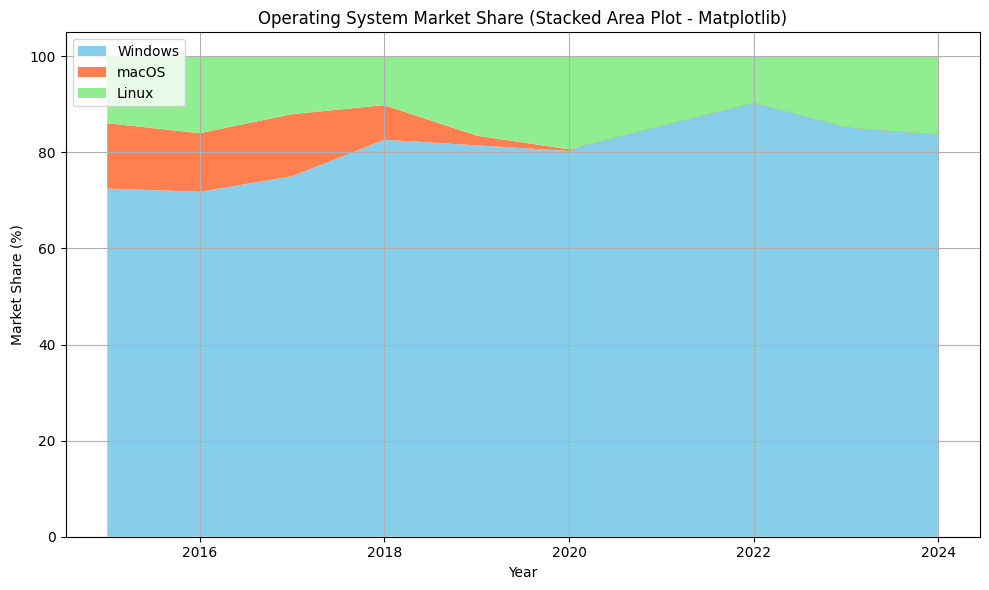

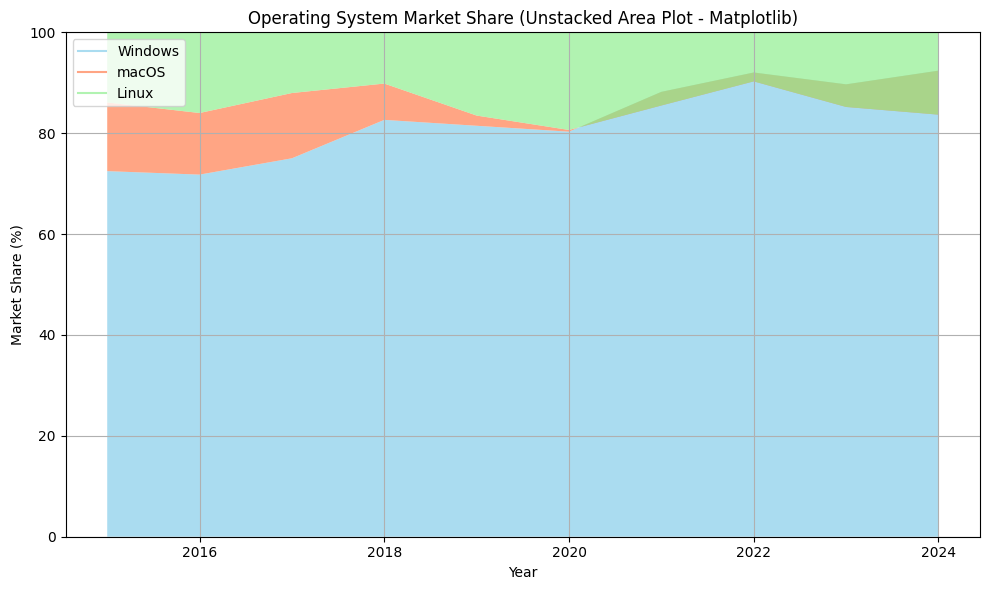

In [3]:
import matplotlib.pyplot as plt

# --- Matplotlib (Stacked Area Plot) ---
plt.figure(figsize=(10, 6))
plt.stackplot(df_os.index, df_os['Windows'], df_os['macOS'], df_os['Linux'],
              labels=['Windows', 'macOS', 'Linux'],
              colors=['skyblue', 'coral', 'lightgreen'])

plt.title('Operating System Market Share (Stacked Area Plot - Matplotlib)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Matplotlib (Unstacked Area Plot) ---
plt.figure(figsize=(10, 6))
plt.plot([],[],color='skyblue', alpha=0.7, label='Windows') #dummy plots for legend
plt.plot([],[],color='coral', alpha=0.7, label='macOS')
plt.plot([],[],color='lightgreen', alpha=0.7, label='Linux')
plt.stackplot(df_os.index, df_os['Windows'], df_os['macOS'], df_os['Linux'],
              colors=['skyblue', 'coral', 'lightgreen'],
              alpha=0.7) # Added transparency

plt.title('Operating System Market Share (Unstacked Area Plot - Matplotlib)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(loc='upper left')
plt.grid(True)
plt.ylim(0,100) # Setting the limits.
plt.tight_layout()
plt.show()

#### Area Plot with Seaborn:

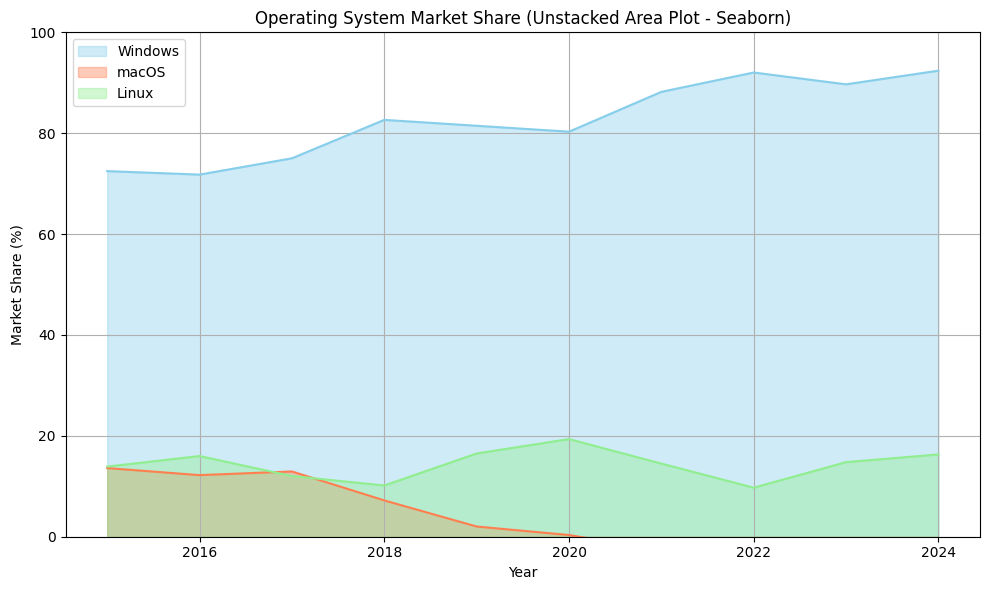

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn doesn't have a direct equivalent of stackplot.

# --- Seaborn (Unstacked Area Plot - using lineplot and fill_between) ---
# We can approximate an unstacked area plot with Seaborn using lineplot and fill_between
df_os_long = df_os.reset_index().melt(id_vars='Year', value_vars=['Windows', 'macOS', 'Linux'], var_name='OS', value_name='Share')

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Share', hue='OS', data=df_os_long, palette=['skyblue', 'coral', 'lightgreen'], legend=False)
for os, color in zip(['Windows', 'macOS', 'Linux'], ['skyblue', 'coral', 'lightgreen']):
    plt.fill_between(df_os.index, df_os[os], color=color, alpha=0.4, label=os)

plt.title('Operating System Market Share (Unstacked Area Plot - Seaborn)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(loc='upper left')
plt.grid(True)
plt.ylim(0, 100)  # Setting the limits
plt.tight_layout()
plt.show()